In [805]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [806]:
# Importar el csv
df = pd.read_csv('/Users/mirandag/Documents/BI/Sin título/hotel_bookings.csv')

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [808]:
df.shape

(119390, 32)

In [809]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


adr-> el precio promedio que se paga al dia / teine valores negativos 
adultos /bebes/children-> sus maximos son de 10 no parece tener sentido el de adultos hasta 55
37% personas ahn cancelado
el tiempo promedio de anticipacion es de 104 aprox 3.5 meses
cada reservacion teine en promedio 1.8 adultos 


In [810]:
# reservations tatus date es fecha 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [811]:
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [812]:
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [813]:
df.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [814]:

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

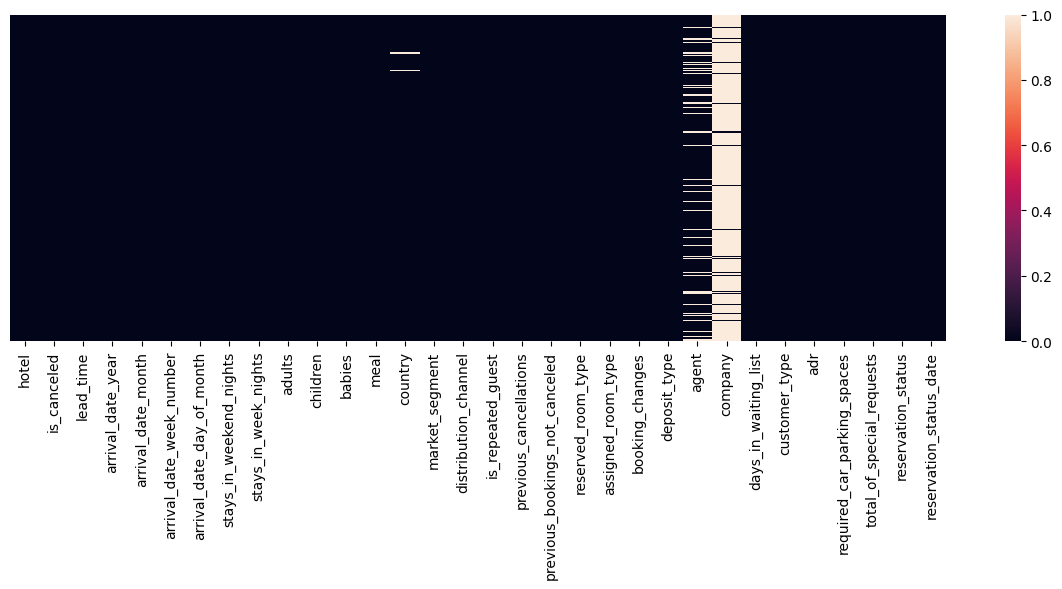

In [815]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

columnas con missing values:
* country
* agent
* company
* children


In [816]:
nan_replacement_dict = {"children": 0 ,"country" : "UKNWN", 'agent' : 0.0, 'company' : 0}
df.fillna(value=nan_replacement_dict, inplace=True)

In [817]:
df.isna().isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [818]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.shape


(119390, 30)

In [819]:
df.duplicated().sum()


np.int64(32020)

In [820]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns.tolist()


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [821]:
df_categoric = df.select_dtypes(include='object')
df_categoric.columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [822]:
categoricas=[col for col in df.columns if df[col].dtype=='object']
categoricas=df[categoricas]
categoricas.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 178
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [823]:
for col in categoricas:
    print(f"{col}: {categoricas[col].nunique(),df[col].unique()}")

hotel: (2, array(['Resort Hotel', 'City Hotel'], dtype=object))
arrival_date_month: (12, array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object))
meal: (5, array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object))
country: (178, array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UKNWN', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'A

In [824]:
print(df['is_canceled'].value_counts())
print(df['is_canceled'].dtype)

is_canceled
0    75166
1    44224
Name: count, dtype: int64
int64


In [825]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [826]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_76802/4056931536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette="hls")


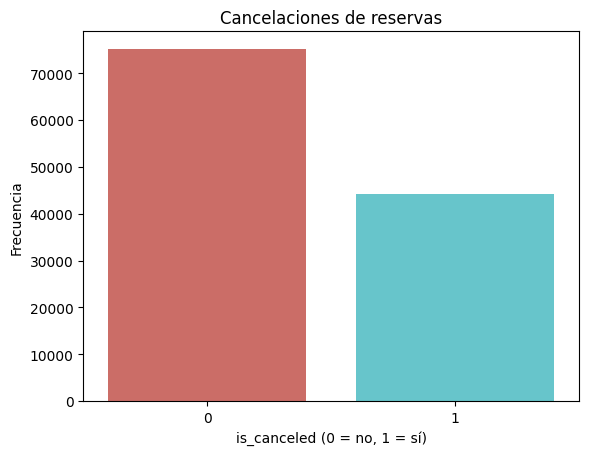

In [827]:
counts = df['is_canceled'].value_counts()
sns.countplot(x='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones de reservas")
plt.xlabel("is_canceled (0 = no, 1 = sí)")
plt.ylabel("Frecuencia")
plt.show()



In [ ]:
n

full_corr = df[num_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    full_corr,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    mask=np.triu(full_corr)
)
plt.title("Matriz de Correlación")
plt.show()


KeyError: "['company'] not in index"

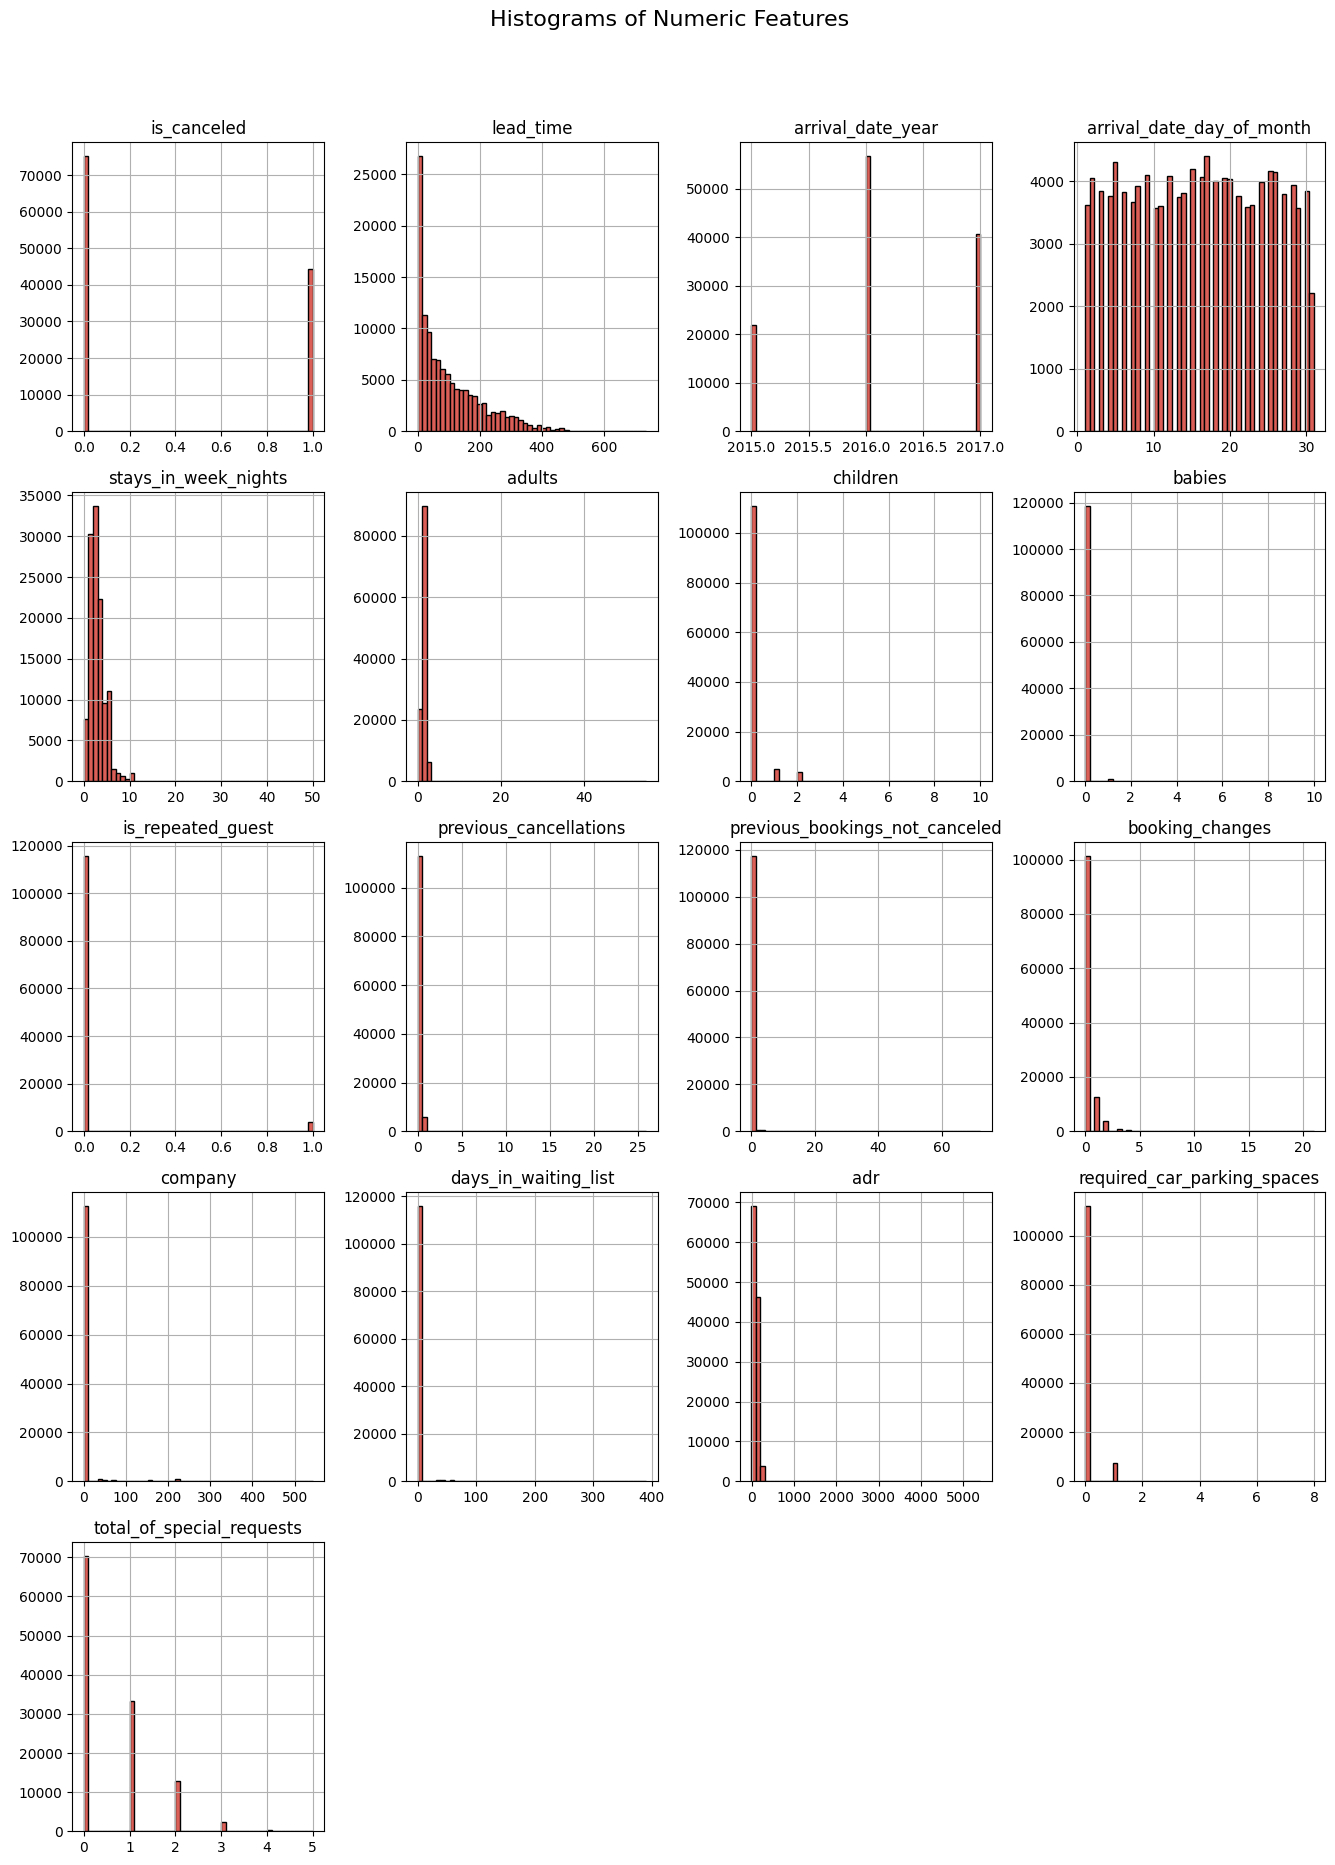

In [ ]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

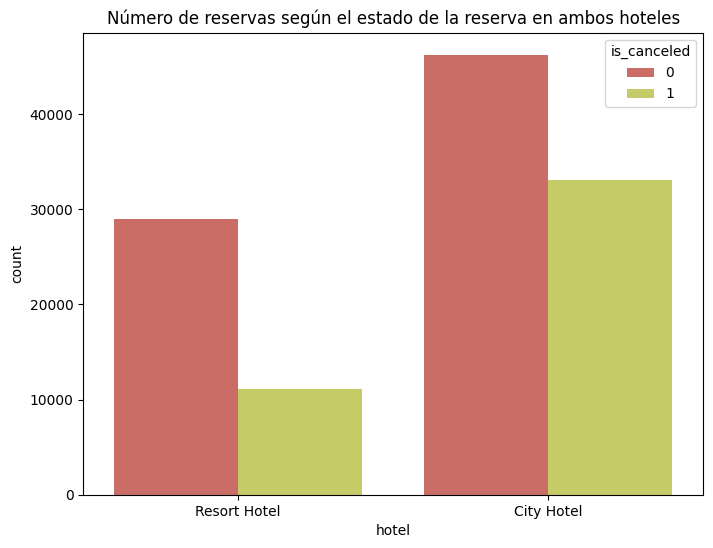

In [ ]:
sns.set_palette("hls")
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled')
plt.title("Número de reservas según el estado de la reserva en ambos hoteles")
plt.show()

In [ ]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: count, dtype: int64

Los hoteles de la ciudad tienen una tasa de cancelación más alta que los resorts.
Alrededor del 30% en los resorts y más del 50% en los urbanos.

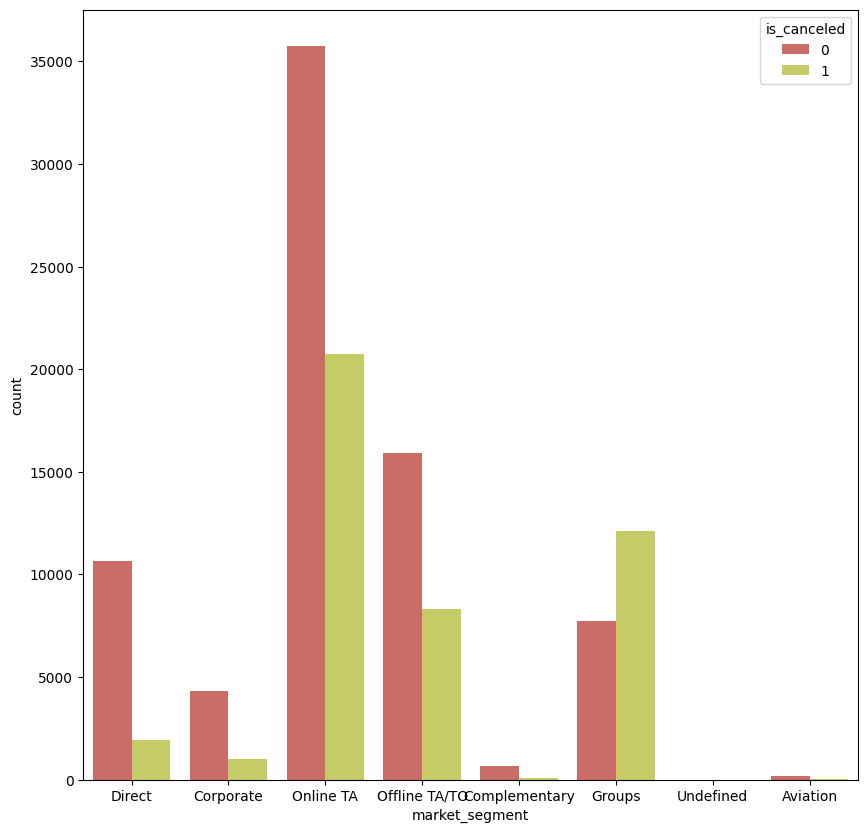

In [ ]:
ax = plt.subplots( nrows = 1, ncols = 1, figsize = (10,10))
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

Las tasas de cancelación suelen ser altas en las reservas online, presencial y de grupo.

Text(0.5, 1.0, 'Lead Time por Año de Llegada y Cancelación')

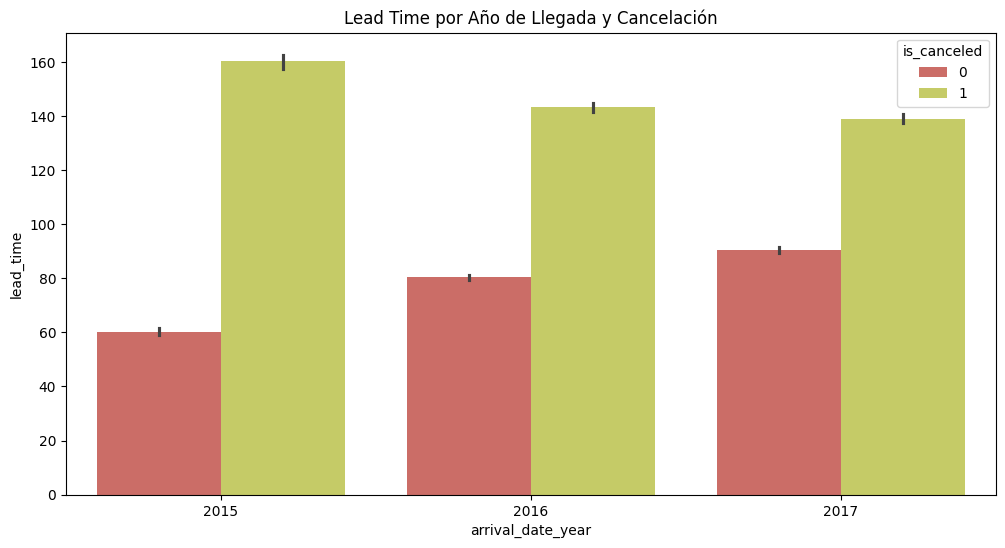

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df)
plt.title("Lead Time por Año de Llegada y Cancelación")

In [ ]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Reservas por Año de Llegada y Tipo de Hotel')

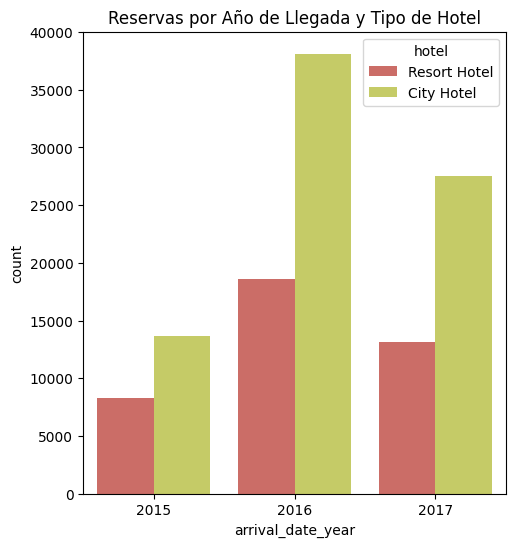

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df)
plt.title("Reservas por Año de Llegada y Tipo de Hotel")

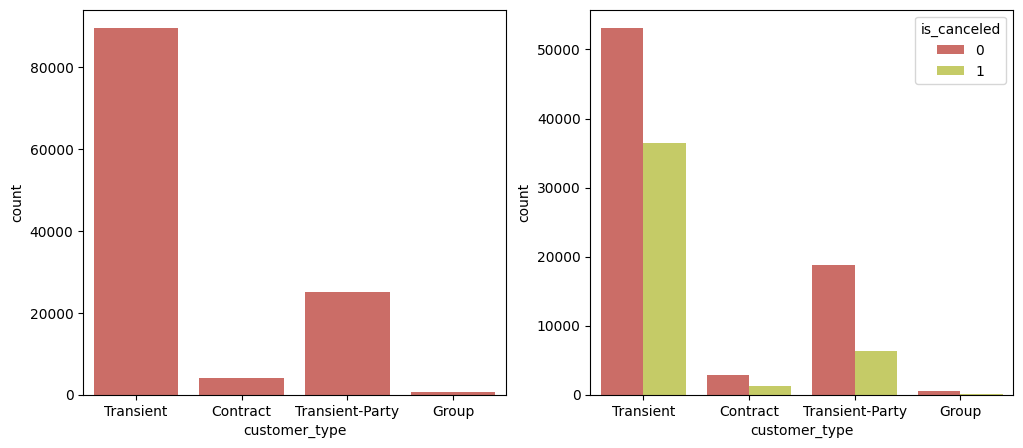

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'customer_type', data = df, ax = ax[0])
sns.countplot(x = 'customer_type', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

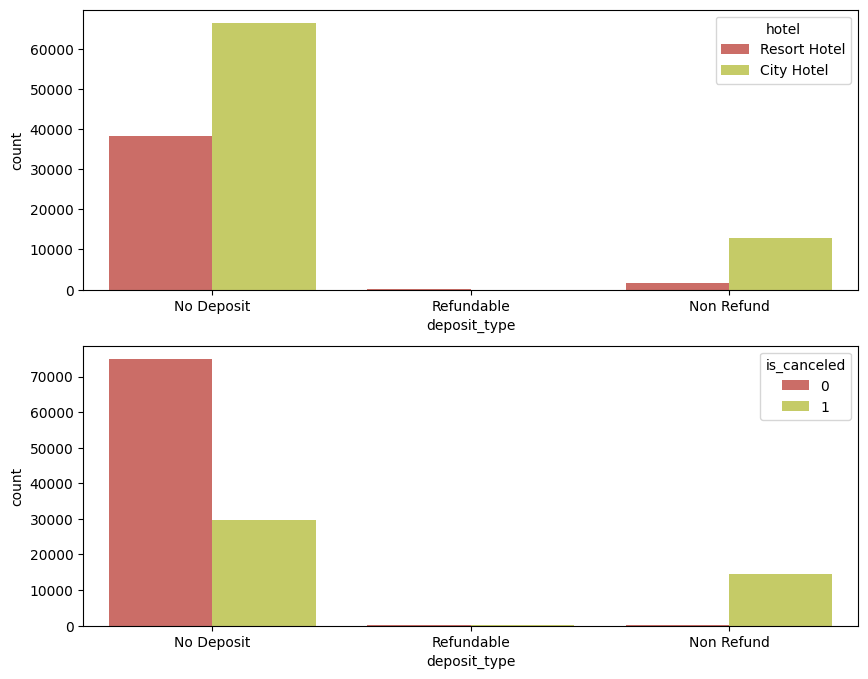

In [ ]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0])
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

ValueError: Could not interpret value `arrival_date_month` for `x`. An entry with this name does not appear in `data`.

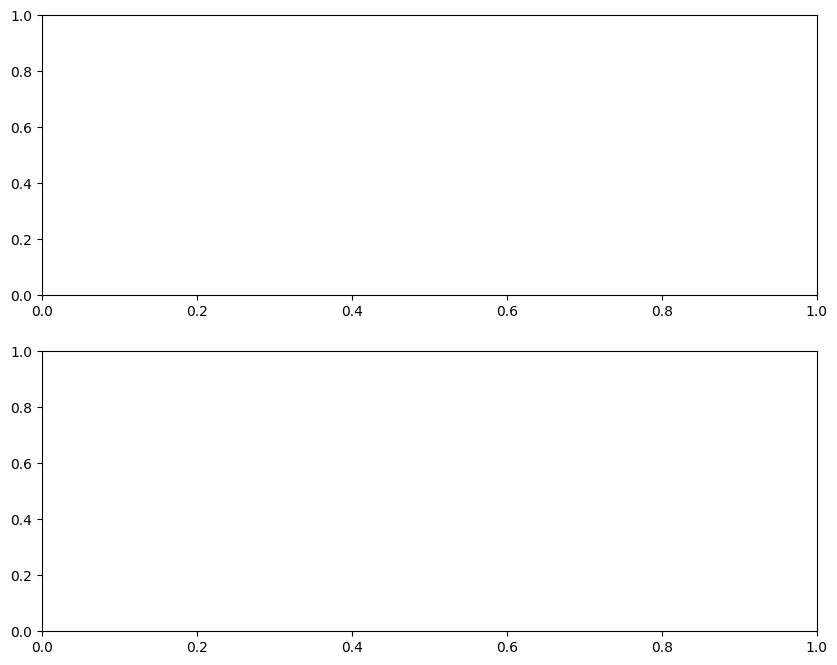

In [ ]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order)
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order)
plt.show()

MODELO

In [ ]:


df.drop(['reservation_status', 
'reservation_status_date' , 'arrival_date_week_number', 
'stays_in_weekend_nights', 'arrival_date_month'], axis = 1, inplace = True)
df.shape

KeyError: "['reservation_status', 'reservation_status_date', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month'] not found in axis"

In [ ]:
hotel={'Resort Hotel':0 , 'City Hotel':1 }


In [ ]:
df['hotel']=df['hotel'].map(hotel)

In [ ]:
#one hot encoding 
df = pd.get_dummies(data = df, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 
                                            'deposit_type'], drop_first = True)

In [ ]:
# para ciudad (300 categorias)
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,country,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,342,2015,1,0,2,0.0,0,135,...,False,False,False,False,False,False,True,False,False,False
1,0,0,737,2015,1,0,2,0.0,0,135,...,False,False,False,False,False,False,True,False,False,False
2,0,0,7,2015,1,1,1,0.0,0,59,...,False,False,False,False,False,False,True,False,False,False
3,0,0,13,2015,1,1,1,0.0,0,59,...,False,False,False,False,False,False,True,False,False,False
4,0,0,14,2015,1,2,2,0.0,0,59,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X= df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=40
)


📌 RANDOM FOREST RESULTS

Accuracy: 0.8830722841108971

Confusion Matrix:
 [[21031  1519]
 [ 2669 10598]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     22550
           1       0.87      0.80      0.84     13267

    accuracy                           0.88     35817
   macro avg       0.88      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



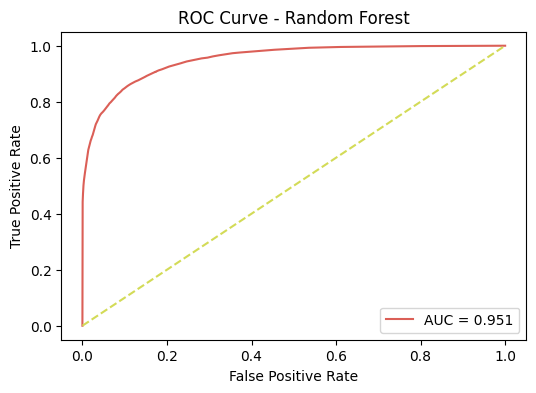

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)

rf = RandomForestClassifier(n_jobs=-1, random_state=40)
rf.fit(X_train, y_train)


rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]


print("📌 RANDOM FOREST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



📌 XGBOOST RESULTS

Accuracy: 0.8696429069994696

Confusion Matrix:
 [[20684  1866]
 [ 2803 10464]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22550
           1       0.85      0.79      0.82     13267

    accuracy                           0.87     35817
   macro avg       0.86      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



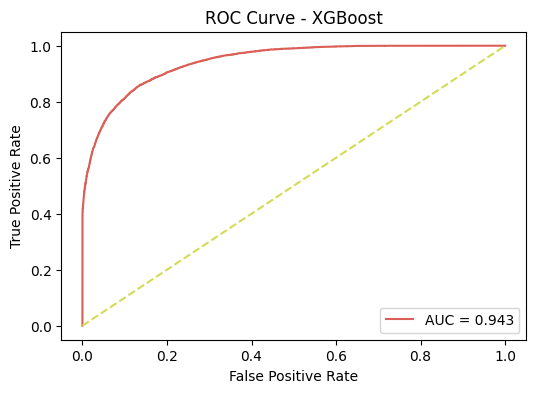

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===========================
# Entrenamiento
# ===========================
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=40,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# ===========================
# Predicciones
# ===========================
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# ===========================
# Métricas
# ===========================
print("📌 XGBOOST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

# ===========================
# ROC & AUC
# ===========================
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
